In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/kaggle/input/car-price-predictionused-cars/car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [2]:
df.shape

(301, 9)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
df.duplicated().sum()

2

In [6]:
df=df.drop_duplicates()

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Present_Price', ylabel='Count'>

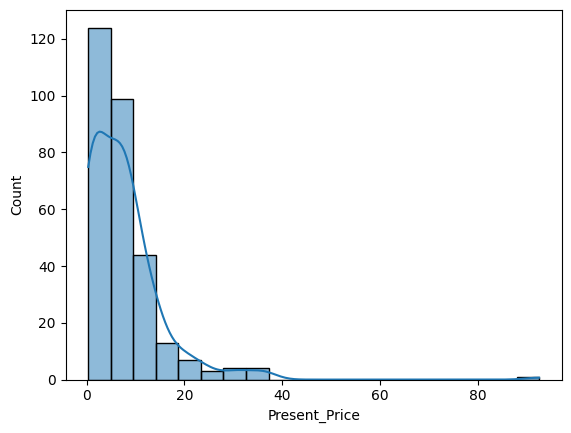

In [9]:
sns.histplot(data=df,x='Present_Price',kde=True,bins=20)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Selling_Price', ylabel='Count'>

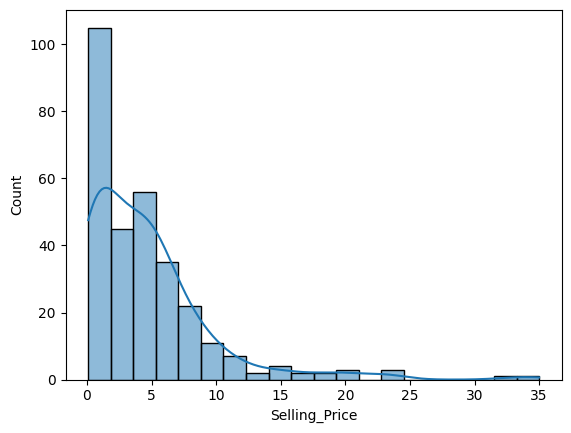

In [10]:
sns.histplot(data=df,x='Selling_Price',kde=True,bins=20)

<Axes: >

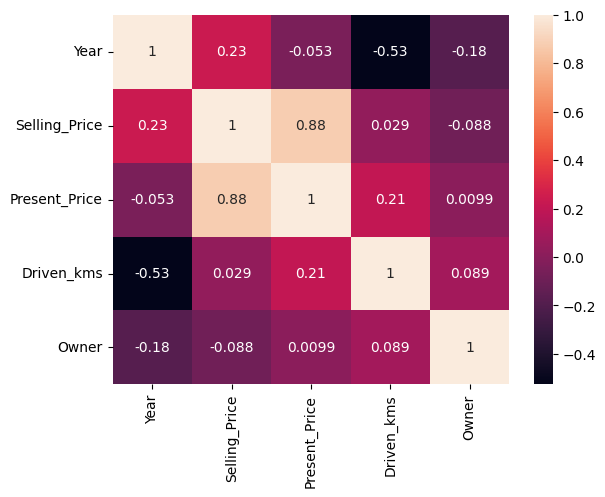

In [11]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [12]:
X=df.drop('Present_Price',axis=1)
y=df['Present_Price']

In [13]:
X_encoded=pd.get_dummies(df,drop_first=True)
X_encoded=X_encoded.astype(int)
X_encoded

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,...,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,2014,3,5,27000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,2013,4,9,43000,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
2,2017,7,9,6900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,2011,2,4,5200,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,2014,4,6,42450,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,9,11,33988,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
297,2015,4,5,60000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
298,2009,3,11,87934,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
299,2017,11,12,9000,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [19]:
X = X_encoded.drop("Present_Price", axis=1)
y = X_encoded["Present_Price"]  

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [27]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
y_pred=model.predict(X_test)

In [28]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


MAE: 1.6377660788694297
MSE: 10.237964479310973
RMSE: 3.1996819340851634


In [29]:
r2=r2_score(y_test,y_pred)
r2

0.8136707441430937